## Pré-Processamento
O pré-processamento dos dados é considerado a parte essencial de um bom projeto. Essa
etapa deve ser utilizada para que você conheça seus dados. Antes de iniciar um projeto e sua
análise, você deve pensar qual seu objetivo final, o que você espera conseguir no final. Além disso, essa também é uma boa hora para pensar e até mesmo decidir, qual ferramenta você irá utilizar para a resolução da questão (Algortimos supervisionados, não-supervisionados,por reforço)
Com o objetivo em mente, você deve então partir para o pré - processamento.
O pré-processameto é aquela parte do seu projeto em que você prepara os dados para serem 
úteis para seu trabalho de análise. Você não pode, ou não deveria, trabalhar com dados faltantes,conflitantes ou dados que não acrescentam ao seu modelo, por exemplo. 
Há diversas técnicas e ferramentas a serem utilizadas nesse estágio incial. Uma boa escolha
de ferramentas e boas decisões aqui, irão influenciar seu resultado final.Vamos ao trabalho!
                                            

A primeira etapa consiste na importação das bibliotecas que vamos utilizar. Em meus projetos,na maioria das vezes utilizo pandas, numpy,matplotlib e seaborn. Por isso, sempre inicio com a importação das mesmas. 

A biblioteca pandas é a ferramenta de código aberto que nos proporciona a capacidade de
trabalhar com planilhas ou tabelas. Você pode estar pensando, por que não utilizar o excel,
por exemplo e mudar a tabela da fonte? O pandas nos permite automatizar e futuramente, reproduzir o que foi feito. Além de ser muito rica e fácil de usar. E possui o incentivo além de ser grátis :).

A biblioteca numpy é utilizada para trabalhar com vetores e matrizes de várias dimensões.Ela é utilizada por exemplo, na divisão dos dados em treino e teste (falaremos sobre isso maia a frente)

As bibliotecas matplotlib e seaborn são bibliotecas gráficas. Serão utilizadas pora confecções de gráficos para o estudo dos dados.O seaborn oferece gráficos estatísticos mais bonitas e complexas.O uso de uma das duas, de ambas ou de uma terceira é pessoal!

O comando matplotlib inline é usado para que os gráficos apareçam "dentro" do notebook, e não 
em uma janela separada.


In [7]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Agora utilizaremos o comando read_csv para "ler" o dataset. Caso seu arquivo se excel o comando será read_excel, se for json será read_json, etc.
Entreo os parenteses foi chamado o dataset de nome train.csv, que encontra-se na mesma pasta do notebook. Caso não esteja, você deve incluir o endereço do arquivo.

In [8]:
data = pd.read_csv('train.csv')

Os comandos head() e tail() irão mostrar as 5 primeiras linhas e as 5 últimas linhas do seu 
dataframe.Caso você queira visualizar mais ou menos colunas, você deve colocar dentro dos 
parenteses.
Ex: head(20) --> lê as 20 primeiras linhas
    tail(15) --> lê as 15 últimas linhas

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Outro comando bastante interessante é o shape que mostra o número de linhas e de colunas do
seu dataframe. (linhas,colunas). Podemos ver que o nosso dataframe de exemplo possui 891 
linhas e 12 colunas. Aliás, esses dados pertencem ao dataset Titanic, que você pode encontrar
no Kaggle. É um dataset muito conhecido e estudado. 

In [12]:
data.shape

(891, 12)

O comando info() é bastantge útil para a visualização do tipo de cada coluna(int,float,
object) e ainda, a quantidade e valores não nulos. Mais para frente veremos a importância 
do tipo e valores nulos das variáveis.
Podemos perceber que as variáveis Age,Cabin e Embarked possuem discrepâncias, que terão que
ser analisadas.
Uma outra maneira de obter os tipos das colunas é o comando dtypes

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Podemos utilizar o comando describe para fazer algumas constatações iniciais. Ele demostra a média dos valores, percentis e contagem.

In [22]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As colunas do dataset são:
    pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

Vamos agora chegar as correlações entre as variáveis. Elas podem ser úteis para seu modelo ou
descartáveis. Depende do problema em questão. A correlação é estudada através de uma 
tabela de correlação, mapa de calor, dispersão...use o que você achar mais confortável para
você.

In [25]:
#Verificando as correlações através de uma tabela
corr = data.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


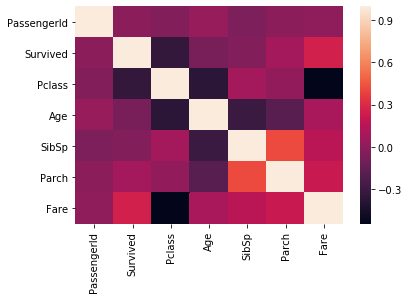

In [27]:
#verificando as correlações através do mapa de calor do Seaborn
sns.heatmap(data.corr(),
xticklabels= corr.columns,
yticklabels=corr.columns)

Podemos fazer também gráficos que auxiliam a compreensão dos dados e o relacionamento 
entre eles. Faremos histograma, gráficos de colunas, dispersão e box plot para exemplificar.